The KNN algorithm is very simple to implement, as it does not need to be trained. The training phase merely stores the training data. For each test point, we calculate the distance of that data point to every existing data point and find the $K$ closest ones. What we return is the the most common amongst the top k classification nearest to the test point. Here's the pseudocode for _K_ Nearest Neighbors:

```
kNN:

    Learn:
        Store training set T to X_train: X_train <-- T


    Predict:
        for every point xp in X_predict:
            for every point x in X_train:
                calculate the distance d in D between x and xp
            sort D in increasing order
            take the "k" items in X_train with the smallest distances to x
            return the majority class among these k items
```

Note that for large data sets, the algorithm can take very long to classify because it has to calculate the distance between the test point and evey other point in the data!


# Distance Metrics - Note

As explained above, KNN assigns a class to the test point based on the majority class of  KK  nearest neighbours. In general, euclidean distance is used to find nearest neighbours, but other distance metrics can also be used.

As the dimensionality of the feature space increases, the euclidean distance often becomes problematic due to the curse of dimensionality (discussed later).

In such cases, alternative vector-based similarity measures (dot product, cosine similarity, etc) are used to find the nearest neighbours. This transforms the original metric space into one more amicable to point-to-point measurements.

Another distance measure that you might consider is Mahalanobis distance. Here's the wikipedia page on Mahalanobis distance. https://en.wikipedia.org/wiki/Mahalanobis_distance Mahalanobis distance attempts to weight features according to their probabilities. On some data sets that may be important.

In general, it's probably a good idea to normalize the data at a minimum. Here's a link to the scikit learn scaling package. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html . You have to be a little circumspect about employing any technique where the answers change with scaling.

## Import packages

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing  # for label encoding of iris dataset
from scipy import stats   # for stats.mode
import matplotlib.pyplot as plt

## Distance metric function

In [2]:
# function to compute distance metrics (Manhattan, Euclidean, Minkowski)

def distance(pt1, pt2, c=2, verbose=False):
    metrics = ['Manhattan', 'Euclidean', 'Minkowski']
    if verbose:
        if c<3:
            print('This distance metric is a measurement of {}'.format(metrics[c-1]))
        else:
            print('This distance metric is a measurement of Minkowski with order {}'.format(c))
    dist = np.power(sum([np.abs(xi-yi)**c for xi, yi in zip(pt1, pt2)]),1/c)
    return dist

## KNN function

In [3]:
# function to implement KNN algorithm

def KNN(X_train, X_predict, k=3):
    
    P = []                  # empty list to store predicted labels
    
    # for every point xp in X_predict
    for xp in X_predict:    
        
        D = []                  # empty list to store index/distance tuples
        
        # for every point xt in X_train
        for i_t, xt in enumerate(X_train):  
            
            # if xp holds only one feature, put it in a list (necessary for the distance function called below)
            if type(xp)==int:  
                xp = [xp]
            
            # calculate the distance d in D between xp and xt
            d = distance(list(xp), list(xt[:-1]))    # exclude last column of X_train (which holds the labels)
            D.append((d, i_t))    
            
        # sort D in increasing order (by distance)
        D_sorted = sorted(D)
        
        # take the "k" items in X_train with the smallest distances to xp
        k_nearest = D_sorted[:k]
        #print(xp, k_nearest)
        
        # return the majority class (i.e. the mode) among these k items
        pred = stats.mode([X_train[i][-1] for (d,i) in k_nearest]).mode[0]
        #print(xp, pred)
        
        # add prediction for xp to the output list
        P.append(pred.squeeze())
        
    return P

## Dataset 1: Pineapples on Pizza (with 1 feature)

In [4]:
# Dataset 1: Classification Data for "Who likes pineapples on pizza?" (only 1 feature)

# https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
    # Column 0: age
    # Column 1: likes pineapple
    
clf_data = [
       [22, 1],
       [23, 1],
       [21, 1],
       [18, 1],
       [19, 1],
       [25, 0],
       [27, 0],
       [29, 0],
       [31, 0],
       [45, 0]]

X_train_1 = clf_data
X_predict_1 = [20, 37, 38]

In [5]:
# KNN of first dataset (only 1 feature)

y_pred_1 = KNN(X_train_1, X_predict_1, k=3)
y_pred_1

[1, 0, 0]

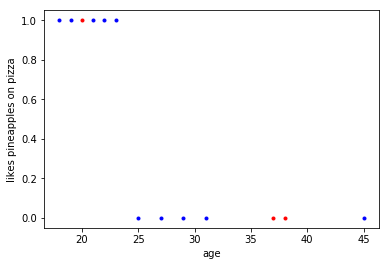

In [14]:
# check if predicted values are reasonable by plotting (blue = training data, red = predicted data)

for points in X_train_1:
     plt.plot(points[0], points[1], 'b.')
for points in zip(X_predict_1,y_pred_1):
     plt.plot(points[0], points[1], 'r.')   
plt.ylabel('likes pineapples on pizza')
plt.xlabel('age');

## Dataset 2: Iris (with 4 features)

In [7]:
# Dataset 2: Iris data (4 features)

iris = pd.read_csv('iris.csv')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [8]:
# transform species labels to numbers

le = preprocessing.LabelEncoder()
le.fit(iris.species.unique())
species = le.transform(iris.species)
iris.species = species
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [9]:
# train test splitting
X_train_2, X_predict_2 = train_test_split(iris)
X_train_2.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
109,7.2,3.6,6.1,2.5,2
111,6.4,2.7,5.3,1.9,2
141,6.9,3.1,5.1,2.3,2


In [10]:
# KNN of second dataset (with 4 features)
class_pred = KNN(X_train_2.values, X_predict_2.values, k=3)
class_true = X_predict_2.species.values

In [11]:
np.array(class_pred), class_true

(array([0., 2., 0., 2., 0., 0., 1., 0., 1., 2., 0., 2., 0., 1., 0., 1., 2.,
        2., 2., 2., 0., 0., 0., 1., 2., 0., 0., 1., 2., 0., 0., 2., 0., 2.,
        0., 0., 1., 2.]),
 array([0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0,
        0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2]))

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(class_pred, class_true)

0.9736842105263158

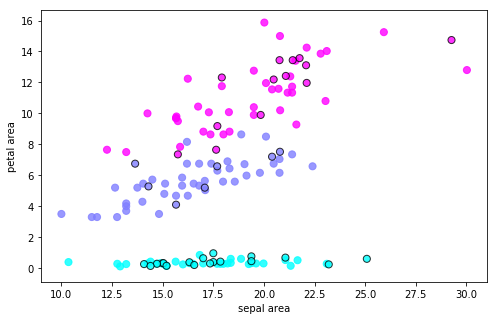

In [13]:
# check if predicted values are reasonable by plotting (without border = training data, with border = predicted data)

fig, ax = plt.subplots(figsize=(8,5))

# training points
x_train = X_train_2.sepal_length * X_train_2.sepal_width
y_train = X_train_2.petal_length * X_train_2.petal_width
plt.scatter(x_train,y_train,c=X_train_2.species,s=50, cmap='cool', alpha=0.8)

# predicted points
x_pred = X_predict_2.sepal_length * X_predict_2.sepal_width
y_pred = X_predict_2.petal_length * X_predict_2.petal_width
plt.scatter(x_pred,y_pred,c=np.array(class_pred),s=50, cmap='cool', alpha=0.8, edgecolor='k')

plt.xlabel('sepal area')
plt.ylabel('petal area');